In [174]:
def display_categ(feature):
    global df
    value_counts = df[feature].value_counts()
    fig, ax = plt.subplots(figsize=(15, 6))
    bar_colors = ['#7C98B3', '#C28569', '#8EB897']  # Custom color palette
    ax.bar(value_counts.index, value_counts.values, color=bar_colors)
    ax.set_xlabel(f'{feature}', fontsize=12)
    ax.set_ylabel('Count', fontsize=12)
    ax.set_title(f'Unique Value Counts of {feature}', fontsize=14)
    ax.grid(axis='y', linestyle='--', alpha=0.5)
    for i, v in enumerate(value_counts.values):
        ax.text(i, v + 0.5, str(v), ha='center', va='bottom', fontweight='bold')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

In [175]:
def display_numer(feature):
    global df
    plt.figure(figsize=(8, 6))
    plt.boxplot(df[feature], vert=False, patch_artist=True, boxprops=dict(facecolor='#7C98B3', color='black'), medianprops=dict(color='black'))
    plt.xlabel('Values', fontsize=12)
    plt.title('Box Plot of {}'.format(feature), fontsize=14)
    plt.grid(axis='x', linestyle='--', alpha=0.5)
    plt.show()

In [176]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import set_config
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')
set_config(display='diagram')

In [177]:
df = pd.read_csv('Cleaned_Data_Merchant_Level.csv')
df.head()

,Trx_Rank,Points,Trx_Vlu,Trx_Age,Customer_Age,Category In English,User_Id,Mer_Id
0,1,20140,2014.0,362,362,Fashion,21053,0
1,1,11200,1120.0,371,368,Fashion,26472,0
2,2,8500,850.0,368,368,Fashion,26472,0
3,1,1980,198.0,558,34,Fashion,27075,0
4,1,2400,240.0,413,413,Fashion,27417,0


In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43672 entries, 0 to 43671
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Trx_Rank             43672 non-null  int64  
 1   Points               43672 non-null  int64  
 2   Trx_Vlu              43672 non-null  float64
 3   Trx_Age              43672 non-null  int64  
 4   Customer_Age         43672 non-null  int64  
 5   Category In English  43672 non-null  object 
 6   User_Id              43672 non-null  int64  
 7   Mer_Id               43672 non-null  int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 2.7+ MB


In [179]:
df.drop_duplicates(inplace=True)

In [180]:
(df.isnull().sum()*100)/len(df)

Trx_Rank               0.0
Points                 0.0
Trx_Vlu                0.0
Trx_Age                0.0
Customer_Age           0.0
Category In English    0.0
User_Id                0.0
Mer_Id                 0.0
dtype: float64

In [181]:
df.nunique()

Trx_Rank                  17
Points                  5911
Trx_Vlu                 5911
Trx_Age                  573
Customer_Age             527
Category In English        7
User_Id                33457
Mer_Id                    56
dtype: int64

In [182]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Trx_Rank,43672.0,1.265227,0.776549,1.0,1.00,1.00,1.00,17.0
Points,43672.0,3312.249748,5756.374137,20.0,1220.00,1893.50,3100.00,263800.0
Trx_Vlu,43672.0,331.224975,575.637414,2.0,122.00,189.35,310.00,26380.0
Trx_Age,43672.0,185.186664,121.989540,1.0,62.00,203.00,271.00,698.0
Customer_Age,43672.0,144.027844,114.764448,1.0,34.00,115.00,252.00,682.0
User_Id,43672.0,17173.411889,9665.399084,0.0,8710.75,17561.00,25634.25,33518.0
Mer_Id,43672.0,16.277111,16.099288,0.0,8.00,8.00,26.00,56.0


- Trx_Rank  --> The number of transaction of this user with this merchant
- Points  --> The Number of points redeemed in this transaction
- Trx_Vlu  --> the equivalent values in pound to the redeemed points
- Trx_Age  --> how many days this transaction was done
- Customer_Age  --> the number of days from which the user made his last transaction ever
- Category In English  --> the category of the merchant
- User_Id  
- Mer_Id

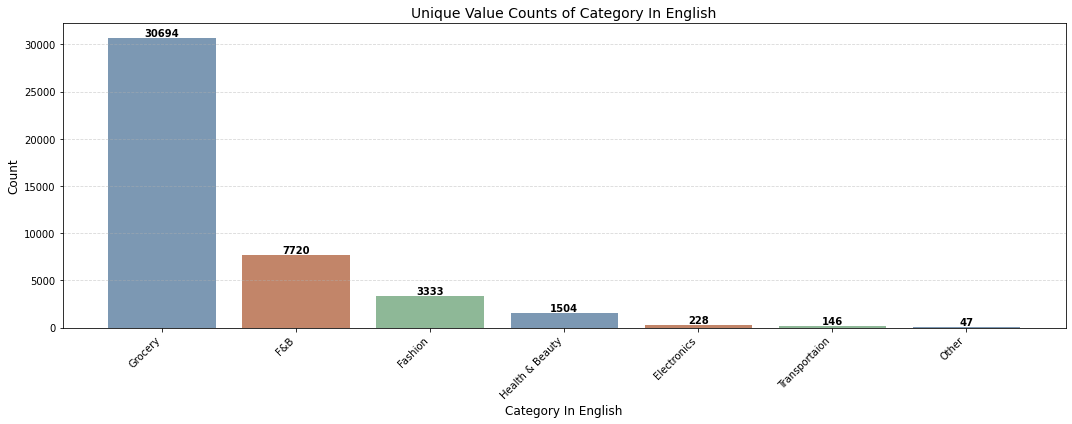

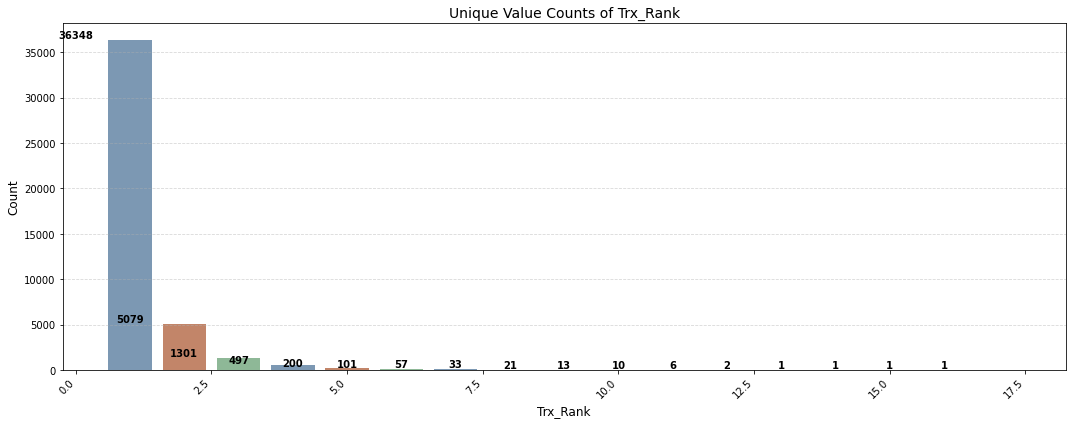

In [183]:
cat=['Category In English','Trx_Rank']
for i in range(len(cat)):
    display_categ(cat[i])

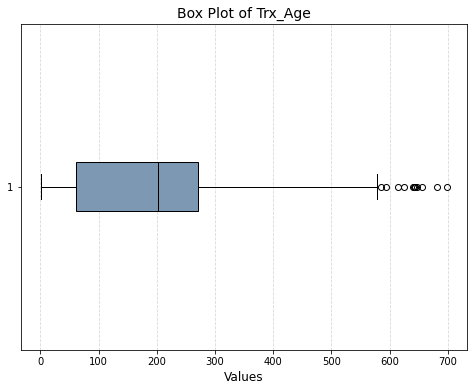

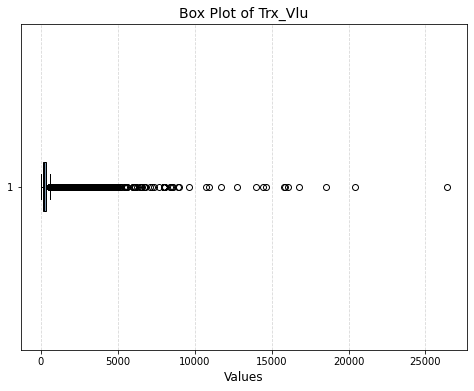

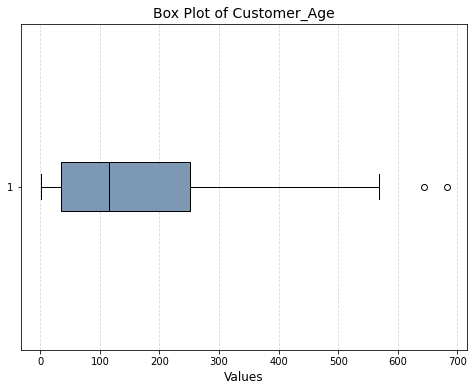

In [184]:
num = ['Trx_Age','Trx_Vlu','Customer_Age']
for i in range(len(num)):
    display_numer(num[i])

In [185]:
# one or more
numerical_col=['Customer_Age','Trx_Vlu']
Q1 = df[numerical_col].quantile(0.25)
Q3 = df[numerical_col].quantile(0.75)
IQR = Q3 - Q1
df.shape
df = df[~((df[numerical_col] < (Q1 - 1.5 * IQR)) |(df[numerical_col] > (Q3 + 1.5 * IQR))).any(axis=1)]
df.reset_index(drop=True, inplace=True)
df.shape

(39026, 8)

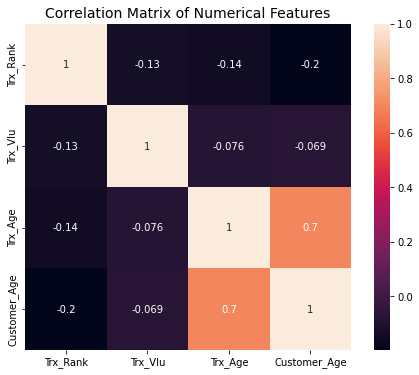

In [186]:
corr_matrix = df.drop(['User_Id','Mer_Id','Points'], axis=1).corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, square=True)
plt.title('Correlation Matrix of Numerical Features', fontsize=14)
plt.show()

In [187]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

# Sample data (replace this with your actual data)

# Perform RFM clustering
features = df[['Customer_Age', 'Trx_Rank', 'Trx_Vlu']]
scaler=StandardScaler()
scaled=scaler.fit_transform(features)

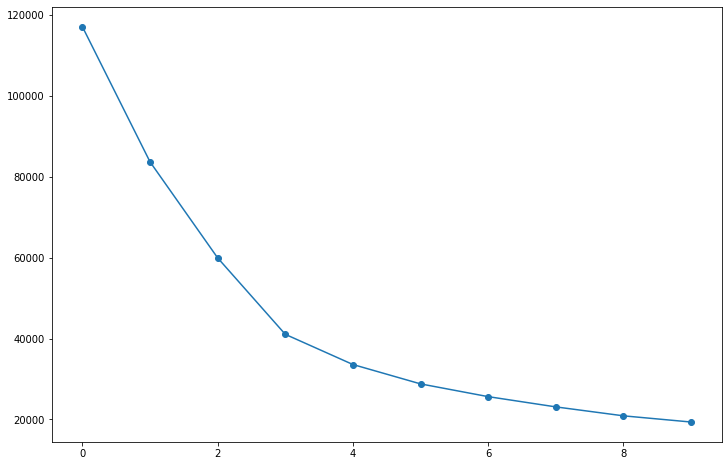

In [188]:
from sklearn.cluster import KMeans

inertia=[]

for i in np.arange(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(scaled)
    inertia.append(kmeans.inertia_)


plt.figure(figsize=(12,8))
plt.plot(inertia, marker="o")

In [189]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled)

In [190]:
def recommend_merchant(user_id):
    user_data = df[df['User_Id'] == user_id]
    cluster_label = user_data['Cluster'].iloc[0]
    recommended_merchant = user_data[user_data['Cluster'] == cluster_label]['Mer_Id'].mode().iloc[0]
    print(cluster_label)
    return recommended_merchant

# Function to recommend a category based on user ID
def recommend_category(user_id):
    user_data = df[df['User_Id'] == user_id]
    cluster_label = user_data['Cluster'].iloc[0]
    recommended_category = user_data[user_data['Cluster'] == cluster_label]['Category In English'].mode().iloc[0]
    return recommended_category
user_id_to_recommend = 29107
recommended_merchant = recommend_merchant(user_id_to_recommend)
recommended_category = recommend_category(user_id_to_recommend)

print(f"For User ID {user_id_to_recommend}:")
print(f"Recommended Merchant: {recommended_merchant}")
print(f"Recommended Category: {recommended_category}")

0
For User ID 29107:
Recommended Merchant: 56
Recommended Category: Other


In [191]:
import joblib
joblib.dump(kmeans, 'rfm_model.pkl')
file_path = 'clusters.csv'
df.to_csv(file_path, index=False)

In [192]:
RFM = df.groupby(['User_Id']).agg({'Trx_Rank':'max','Trx_Vlu': 'sum','Customer_Age':'max'})
RFM.columns=['Frequency','Monetary','Recency']
RFM

,Frequency,Monetary,Recency
User_Id,,,
0,1,442.7,281
1,1,249.0,34
2,1,300.0,236
3,1,162.0,320
4,1,70.0,407
...,...,...,...
33514,3,594.0,101
33515,1,48.0,244
33516,1,132.0,256


In [194]:
features = RFM
scaler=StandardScaler()
scaled=scaler.fit_transform(features)
kmeans = KMeans(n_clusters=3, random_state=42)
RFM['Cluster'] = kmeans.fit_predict(scaled)+1
RFM

,Frequency,Monetary,Recency,Cluster
User_Id,,,,
0,1,442.7,281,3
1,1,249.0,34,1
2,1,300.0,236,3
3,1,162.0,320,3
4,1,70.0,407,3
...,...,...,...,...
33514,3,594.0,101,2
33515,1,48.0,244,3
33516,1,132.0,256,3


In [196]:
final=RFM.groupby("Cluster")["Recency","Frequency","Monetary"].mean()
final

,Recency,Frequency,Monetary
Cluster,,,
1,62.191256,1.154303,258.882366
2,77.312356,3.111432,679.354850
3,266.010507,1.037729,191.922822


In [198]:
def func(row):
    if row["Cluster"]==3:
        return 'Rare'
    elif row["Cluster"]==2:
        return 'Whales'
    else:
        return 'Avg'

In [199]:
RFM['group']=RFM.apply(func, axis=1)

In [200]:
RFM

,Frequency,Monetary,Recency,Cluster,group
User_Id,,,,,
0,1,442.7,281,3,Rare
1,1,249.0,34,1,Avg
2,1,300.0,236,3,Rare
3,1,162.0,320,3,Rare
4,1,70.0,407,3,Rare
...,...,...,...,...,...
33514,3,594.0,101,2,Whales
33515,1,48.0,244,3,Rare
33516,1,132.0,256,3,Rare


In [201]:
RFM.group.value_counts()

Rare      14657
Avg       14478
Whales     1732
Name: group, dtype: int64

<AxesSubplot:>

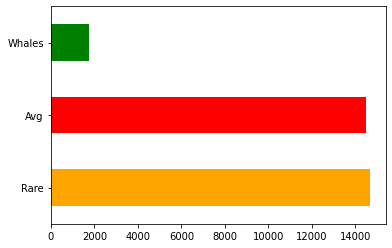

In [202]:
result=RFM.group.value_counts()
result.plot(kind="barh", color=["Orange","Red","Green"])